In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create initial dataframe. contains data on all companies in fortune 500.

df = pd.read_csv('fortune500.csv', index_col=0)

In [3]:
# first entries in the data frame.

df.head(12)

,Name,Revenue,Rank
Year,,,
2021,Walmart,559151.0,1
2021,Amazon,386064.0,2
2021,Apple,274515.0,3
2021,CVS,268706.0,4
2021,UnitedHealth Group,257141.0,5
2021,Berkshire Hathaway,245510.0,6
2021,McKesson,231051.0,7
2021,AmerisourceBergen,189893.9,8
2021,Alphabet,182527.0,9


In [4]:
df.dtypes

Name        object
Revenue    float64
Rank         int64
dtype: object

In [5]:
# create limited data frame containing data on only companies ranked 1-10 each year.

top10 = df.loc[df['Rank'] <= 10]

In [6]:
top10.head(12)

,Name,Revenue,Rank
Year,,,
2021,Walmart,559151.0,1
2021,Amazon,386064.0,2
2021,Apple,274515.0,3
2021,CVS,268706.0,4
2021,UnitedHealth Group,257141.0,5
2021,Berkshire Hathaway,245510.0,6
2021,McKesson,231051.0,7
2021,AmerisourceBergen,189893.9,8
2021,Alphabet,182527.0,9


In [7]:
# count of times each company has appeared in top 10.

top10_count = pd.Series.to_frame(top10['Name'].value_counts())
print(top10_count)

                    Name
Exxon Mobil           67
General Motors        63
Ford Motor            62
General Electric      59
Mobil                 43
IBM                   42
Texaco                36
Chevron               29
AT&T                  28
Chrysler              28
Walmart               27
Gulf Oil              25
U.S. Steel            15
DuPont                14
Altria Group          13
Berkshire Hathaway    11
Citigroup             10
Conoco                 9
Apple                  9
Esmark                 8
CVS                    7
Amoco                  6
UnitedHealth Group     6
McKesson               6
ITT                    6
AIG                    5
Bank of America        4
Amazon                 4
Valero Energy          3
AmerisourceBergen      3
Hewlett-Packard        3
Phillips 66            3
Bethlehem Steel        2
Armour                 2
Boeing                 2
Enron                  2
Verizon                2
Fannie Mae             2
Sears                  1


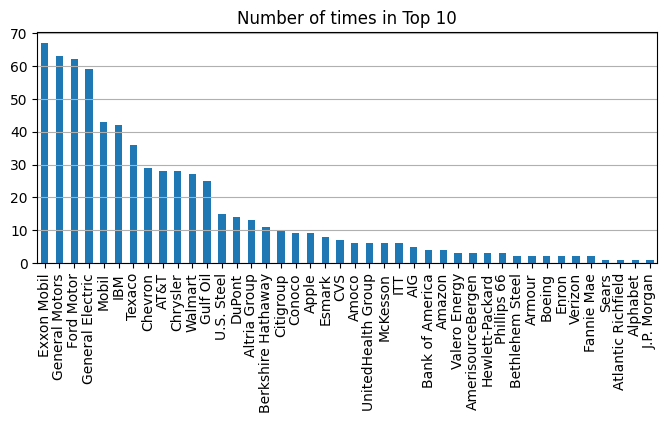

In [8]:
# number of appearances in the top 10 demonstrated as a chart.

top10_count.plot(kind = 'bar', figsize = (8,3), legend = None)
plt.title('Number of times in Top 10')
plt.grid(axis = 'y')
plt.show()

In [9]:
# create dataframe containing top ranking company for each year

number1 = df.loc[df['Rank'] == 1].reset_index()

In [10]:
print(number1)

    Year            Name   Revenue  Rank
0   2021         Walmart  559151.0     1
1   2020         Walmart  523964.0     1
2   2019         Walmart  514405.0     1
3   2018         Walmart  500343.0     1
4   2017         Walmart  485873.0     1
..   ...             ...       ...   ...
62  1959  General Motors    9522.0     1
63  1958  General Motors   10989.8     1
64  1957  General Motors   10796.4     1
65  1956  General Motors   12443.3     1
66  1955  General Motors    9823.5     1

[67 rows x 4 columns]


In [11]:
# determine which companties have reached rank 1, and how amny time

number1_count = (number1['Name'].value_counts())
print(number1_count)

General Motors    37
Walmart           17
Exxon Mobil       13
Name: Name, dtype: int64


In [12]:
# create individual dataframe for each rank 1 company

GM1 = number1.loc[number1['Name'] == 'General Motors']
EM1 = number1.loc[number1['Name'] == 'Exxon Mobil']
WM1 = number1.loc[number1['Name'] == 'Walmart']


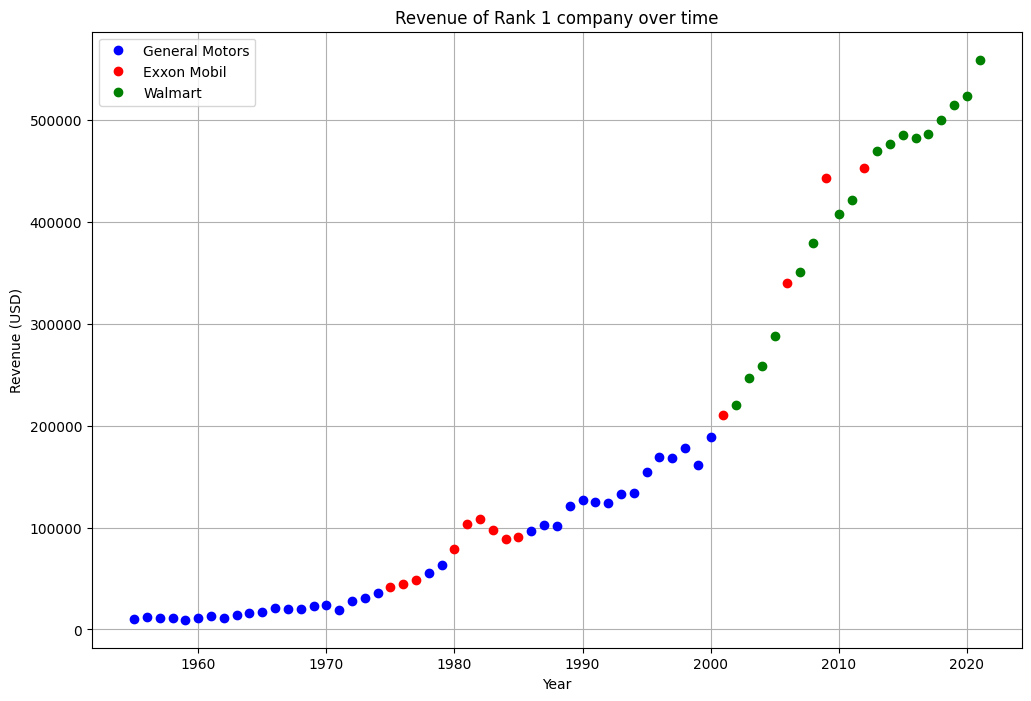

In [13]:
plt.figure(figsize = (12,8))
plt.plot(GM1['Year'], GM1['Revenue'], 'o', color = 'blue', label = 'General Motors')
plt.plot(EM1['Year'], EM1['Revenue'], 'o', color = 'red', label = 'Exxon Mobil')
plt.plot(WM1['Year'], WM1['Revenue'], 'o', color = 'green', label = 'Walmart')
plt.title('Revenue of Rank 1 company over time')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.grid()
plt.legend()
plt.show()


In [64]:
# create cpi dataframe

cpi = pd.read_csv("cpi.csv", index_col=0)

''' Create a column to determine purchasing power in a given year relative to 2021, based on average consumer price index.
The formula is: ([cpi of ending year]/[cpi of beginning year]) * price
For example: cpi in 1955 = 26.8; cpi in 2021 = 270.970 
270.970/26.8 = 10.11; 10.11*$5 = $50.55
So, $5 in 1955 has approximately the purchasing power of $50.55 in 2021
Data acquired from the Department on Labor Satistics, link found in readme.md '''

cpi["purchasing_power"] = cpi["cpi"].apply(lambda x: (270.970/x))

In [65]:
cpi.head()

,cpi,purchasing_power
Year,,
1955,26.8,10.110821
1956,27.2,9.962132
1957,28.1,9.643060
1958,28.9,9.376125
1959,29.1,9.311684


In [66]:
cpi.tail()

,cpi,purchasing_power
Year,,
2017,245.120,1.105459
2018,251.107,1.079102
2019,255.657,1.059897
2020,258.811,1.046980
2021,270.970,1.000000
